# Bohmian Equations: Resonant cases

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

This expressions matches the one in the Overleaf project of the students

In [2]:
def Bohmian_velocity_field(time, u, PARAMETERS=[1,1,1,0]):
    x, y = u.T
    #model parameters
    a, b, omega2, t0 = PARAMETERS
    t = time + t0
    #velocity components
    G = 1 + 2*a*x*np.cos(t) +\
        2*b*np.sqrt(omega2)*x*y*np.cos((1 + omega2)*t) +\
        (a*x)**2 +\
        2*a*b*np.sqrt(omega2)*x**2*y*np.cos(omega2*t) +\
        omega2*(b*x*y)**2
    vx = -(a*np.sin(t) + b*np.sqrt(omega2)*y*np.sin((1 + omega2)*t))/G
    vy = -b*np.sqrt(omega2)*x*(a*x*np.sin(omega2*t) + np.sin((1 + omega2)*t))/G
    
    return np.column_stack([vx, vy])

In [3]:
def Bohmian_nodal_point(t, PARAMETERS=[1,1,1]):
    #model parameters
    a, b, omega2 = PARAMETERS
    #nodal components
    x_nodal = -np.sin((1 + omega2)*t)/(a*np.sin(omega2*t))
    y_nodal = -a*np.sin(t)/(b*np.sqrt(omega2)*np.sin((1 + omega2)*t))
    
    return np.column_stack([x_nodal, y_nodal])

# Case: $a, b, \omega_2 = (0, 1, N)$

# Description

* Wave function

\begin{equation*}
    \Psi = \psi_{0,0} + \frac{1}{2}\psi_{1,1}
\end{equation*}

* Bohm equations of motion

\begin{aligned}
    \frac{dx}{dt}=-\frac{ \sin(2t)y}{1+2 xy \cos(2t)+ x^2y^2} \\
    \frac{dy}{dt}=-\frac{ \sin(2t)x}{1+2 xy \cos(2t)+ x^2y^2} 
\end{aligned}

* Nodal lines (where $\Psi(x_N, y_N, t_N) = 0$)

\begin{equation*}
(x_N, y_N, t_N) = ( (-1)^{k+1}/y, y, k \pi/2) \quad y \in \mathbb{R}; k \in \mathbb{Z}
\end{equation*}

# Vector field 

In [10]:
N = 4
a, b, omega2, t0 = [0, 1, N, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

# Nodal lines and invariant sets

## Figure: ALL nodal lines and invariant sets

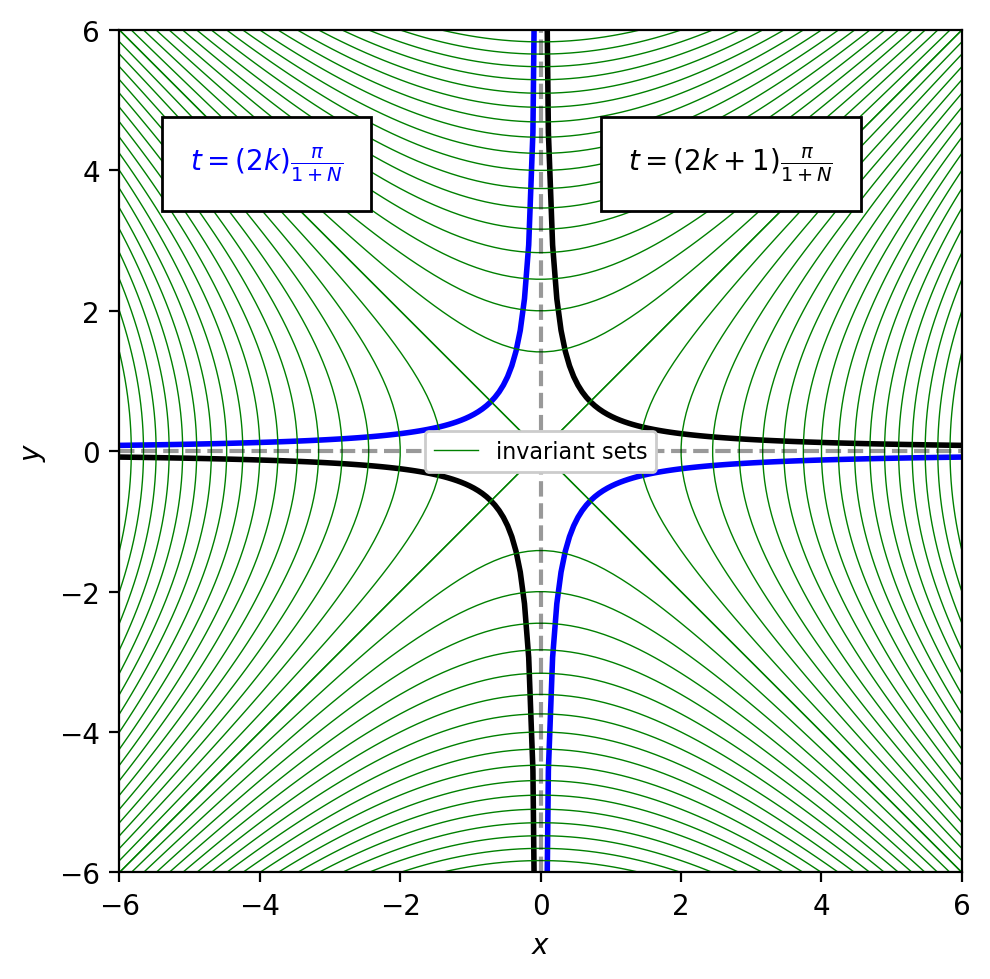

In [11]:
x_left = np.linspace(-6, -0.05, 100)
x_right = np.linspace(0.05, 6, 100)

fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)
##################################################
for x in [x_left, x_right]:
    ax.plot(x, -1/(x*np.sqrt(N)),color="blue",lw=2)
    ax.plot(x,  1/(x*np.sqrt(N)),color="black",lw=2)

ax.text(1.25,4,"$t = (2k + 1) \\frac{\pi}{1+N}$",color="black",fontsize=10,zorder=20,
        bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})

ax.text(-5,4,"$t = (2k) \\frac{\pi}{1+N}$", color="blue", fontsize=10,zorder=20,
       bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
##################################################
# invariant sets
x = np.linspace(-6,6,100)
lw = 0.5
#vertical parabolas
for Q in np.arange(0,40,2):
    ax.plot(x, np.sqrt(Q + x**2),color="green",lw=lw)
    ax.plot(x,-np.sqrt(Q + x**2),color="green",lw=lw)
#horizontal parabolas
for Q in np.arange(0,-40,-2):
    ax.plot( np.sqrt(-Q + x**2),x,color="green",lw=lw)
    ax.plot(-np.sqrt(-Q + x**2),x,color="green",lw=lw)
#label
ax.plot([],[],color="green",lw=lw,label="invariant sets")

# #selected invariant set
# Q = 0
# x = np.linspace(0,6,100)
# ax.plot(x, np.sqrt(Q + x**2),color="magenta",lw=2,alpha=1)

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",alpha=0.4)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.legend(loc="center",facecolor='white', framealpha=1,fontsize=8)
ax.set_aspect("equal")
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

fig.tight_layout()

plt.show()

## Figure: SELECTED invariant set: $Q = 0$

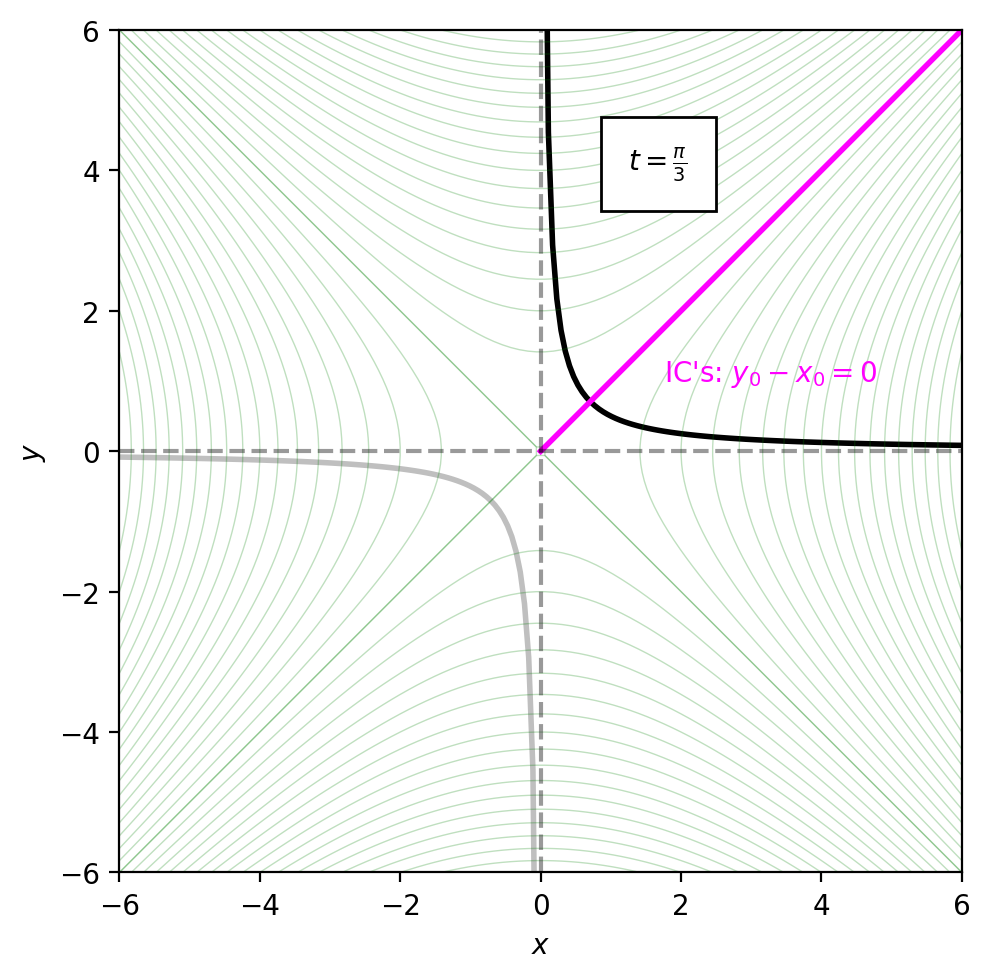

In [12]:
x_left = np.linspace(-6, -0.05, 100)
x_right = np.linspace(0.05, 6, 100)

fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)
##################################################
x = x_left
ax.plot(x,  1/(x*np.sqrt(N)),color="black",lw=2, alpha=0.25)
x = x_right
ax.plot(x,  1/(x*np.sqrt(N)),color="black",lw=2)
    
ax.text(1.25,4,"$t = \\frac{\pi}{3}$",color="black",fontsize=10,zorder=20,
        bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
##################################################

# invariant sets
x = np.linspace(-6,6,100)
lw = 0.5
# vertical parabolas
for Q in np.arange(0,40,2):
    ax.plot(x, np.sqrt(Q + x**2),color="green",lw=lw,alpha=0.25)
    ax.plot(x,-np.sqrt(Q + x**2),color="green",lw=lw,alpha=0.25)
#horizontal parabolas
for Q in np.arange(0,-40,-2):
    ax.plot( np.sqrt(-Q + x**2),x,color="green",lw=lw,alpha=0.25)
    ax.plot(-np.sqrt(-Q + x**2),x,color="green",lw=lw,alpha=0.25)
# label
# ax.plot([],[],color="green",lw=lw,label="invariant sets")

#selected invariant set
Q = 0
x = np.linspace(0,6,100)
ax.plot(x, np.sqrt(Q + x**2),color="magenta",lw=2,alpha=1)
ax.text(1.75,1,"IC's: $y_0 - x_0 = 0$",color="magenta")

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",alpha=0.4)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

# ax.legend(loc="center",facecolor='white', framealpha=1,fontsize=8)
ax.set_aspect("equal")
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

fig.tight_layout()
plt.show()

# Nodal lines and trajectories from invariant sets

In [13]:
def print_t_label(k, T_string):
    if k == 0:
        return "0"
    elif k == 1:
        return T_string
    else:
        return str(k)+T_string

## Planar projection

In [14]:
e1 = np.array([1,1])/np.sqrt(2)

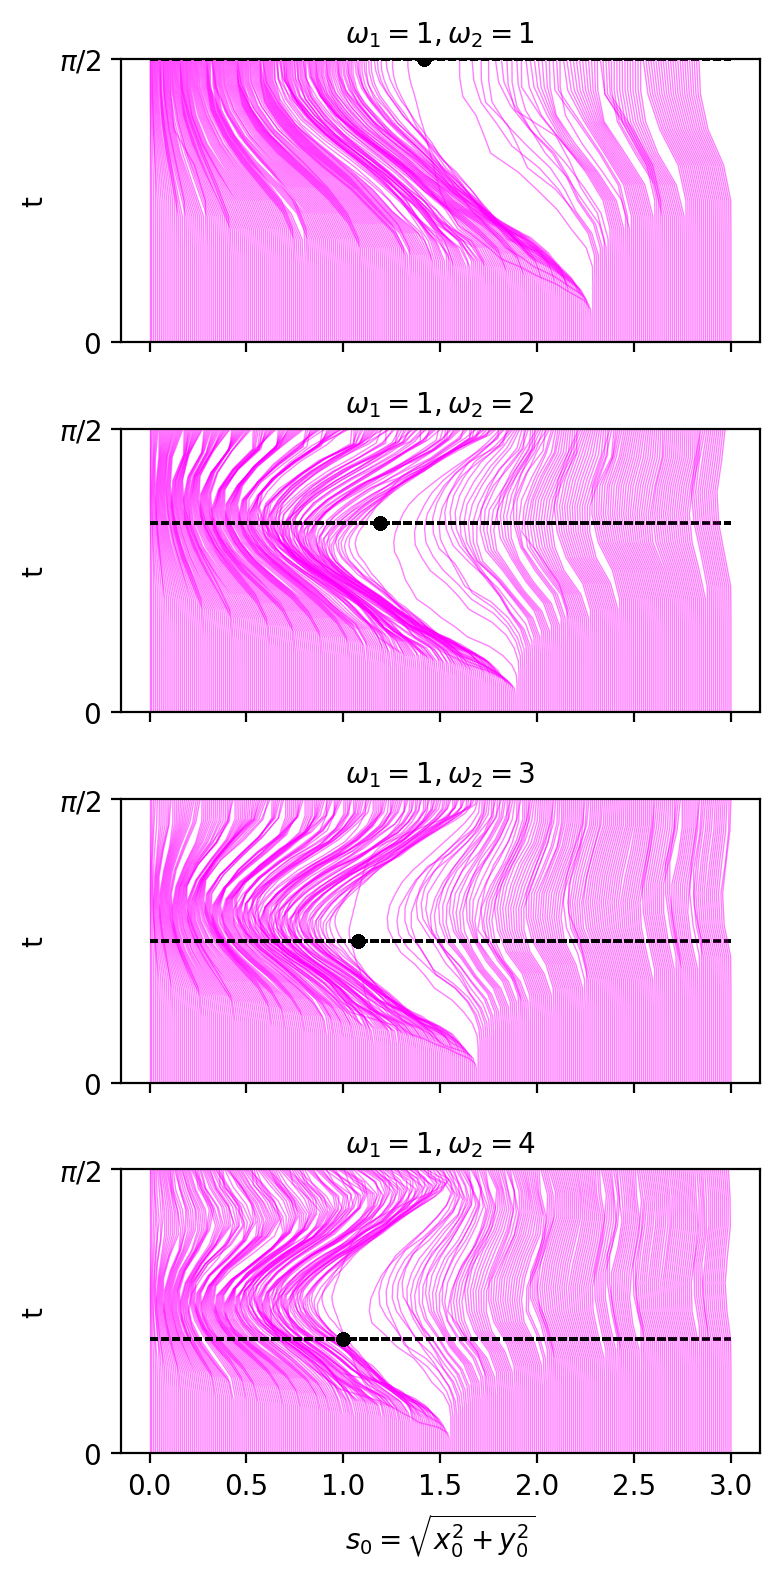

In [84]:
N_max = 4
fig,ax = plt.subplots(N_max,1,figsize=(4,8),dpi=200,sharex=True,sharey=True)
Axes = {
    0: ax[0],
    1: ax[1],
    2: ax[2],
    3: ax[3]
}

# Line of ICs along invariant line
s_min = 0
s_max = 3
ax1.plot([s_min, s_max],[0,0],color="magenta")

t0 = 0
tf = np.pi/2
time_span = (t0, tf)

vector_field = Bohmian_velocity_field
n_traj = 300
color_traj = "magenta"


for N in range(1, N_max+1):
    ax = Axes[N-1]
    
    #set vector field
    a, b, omega2, t0 = [0, 1, N, 0]
    f = lambda t, u: vector_field(t, u, PARAMETERS=[a, b, omega2, t0])

    for h in np.linspace(s_min, s_max, n_traj):
        #take initial condition from invariant line
        ic = h*e1

        #integrate trajectories
        solution = solve_ivp(f, time_span, ic, rtol=2.220446049250313e-14)
        trajectory = solution.y

        #project trajectory onto invariant line
        traj_projected = [np.dot(e1, trajectory.T[i]) for i in range(len(trajectory.T))]
        n = len(trajectory[0])
        
        ax.plot(traj_projected, np.linspace(*time_span,n), c=color_traj, lw=0.5, alpha=0.5)
        
        # intersection: invariant line and first nodal line
        intersection = np.dot(e1, np.array([1,1])*np.sqrt(1/np.sqrt(N)))
        # occurence time: first nodal line
        t_nodal = np.pi/(1+N) 
        ax.scatter(intersection,t_nodal,color="black",s=15,alpha=1,zorder=10)

        #reference line
        ax.plot([s_min,s_max],2*[t_nodal],color="black",linestyle="--",lw=0.75,alpha=0.5)
        
        # customise subplot
        title = "$\omega_1 = 1, \omega_2 ="+str(N)+"$"
        ax.set_title(title,fontsize=10)
        ax.set_ylim(*time_span)
        ax.set_ylabel("t")

#tick labels
ax.set_yticks([0, np.pi/2])
ax.set_yticklabels(["0", "$\pi/2$"])
#axes labels
ax.set_xlabel("$s_0 = \sqrt{x_0^2 + y_0^2}$")
        
fig.tight_layout()
plt.show()

# Lagrangian descriptor and invariant sets

## Figure: plot LD gradient, nodal lines, and invariant set

In [6]:
from ldds.base import compute_lagrangian_descriptor

Common input parameters

In [37]:
# Integration parameters
tau = np.pi

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False

Compute and plot LDs for four resonant cases

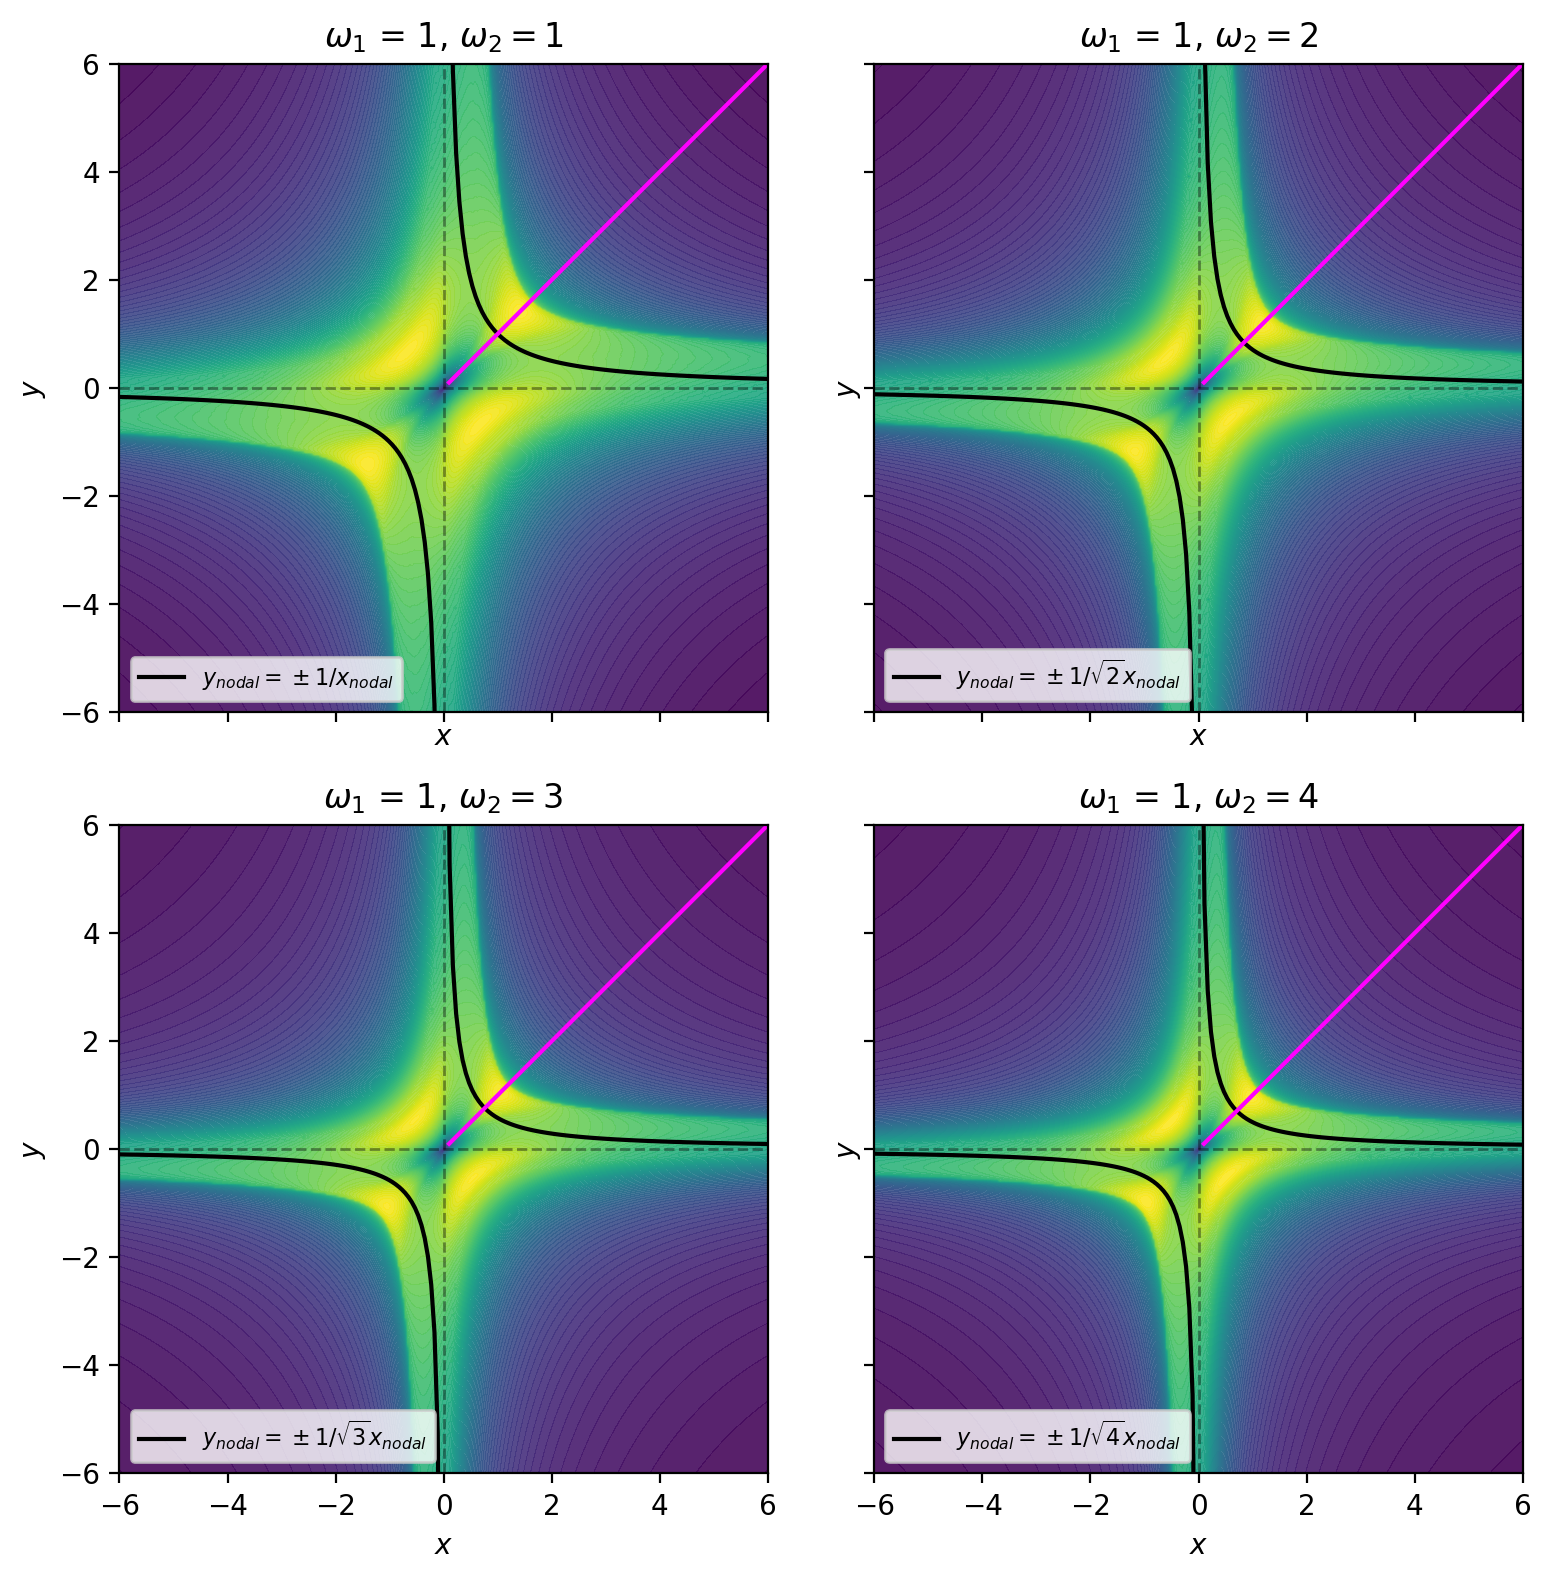

In [38]:
fig,ax = plt.subplots(2,2,figsize=(8,8),dpi=200,sharex=True, sharey=True)

Axes = {
    0: ax[0,0],
    1: ax[0,1],
    2: ax[1,0],
    3: ax[1,1]
}

x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

for N in range(1,5):
    ax = Axes[N-1]
    
    # define vector field 
    a, b, omega2, t0 = [0, 1, N, 0]
    vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

    # compute total LD
    f = lambda t:compute_lagrangian_descriptor(grid_parameters,vector_field,t,p_value,box_boundaries)
    LD_forward = f(tau); LD_backward = f(-tau); LD = LD_forward + LD_backward
    
    # plot total LD
    ax.contourf(x, y, LD, cmap="viridis",levels=100, alpha=0.9)

    # plot nodal lines: right branch
    x_nodal = np.linspace(0.05, 6, 100); y_nodal = 1/(np.sqrt(N)*x_nodal)
    ax.plot(x_nodal, y_nodal, color="black",lw=1.5,)
    
    # plot nodal lines: left branch 
    x_nodal = np.linspace(-0.05, -6, 100); y_nodal = 1/(np.sqrt(N)*x_nodal)
    ax.plot(x_nodal, y_nodal, color="black",lw=1.5)
    
    # plot invariant straight line
    x_invariant = np.linspace(0.1,6,300)
    y_invariant = x_invariant
    curve = np.column_stack([x_invariant, y_invariant])
    ax.plot(*curve.T,color="magenta")

    #reference lines
    ax.plot([-6,6],[0,0],color="black",linestyle="--",lw=1,alpha=0.4)
    ax.plot([0,0],[-6,6],color="black",linestyle="--",lw=1,alpha=0.4)
    
    # Customise appearance
    title = "$\omega_1$ = 1, "+"$\omega_2 = $"+str(N)
    ax.set_title(title)
    
    if N == 1:
        label_nodal = "$y_{nodal} = \pm 1/ x_{nodal}$"
    else:
        label_nodal = "$y_{nodal} = \pm 1/ \sqrt{"+str(N)+"} x_{nodal}$"
    ax.plot([],[],color="black",lw=1.5,label=label_nodal)
    ax.legend(loc="lower left", fontsize=8)
    
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_aspect("equal")
    ax.set_xlim(-6,6)
    ax.set_ylim(-6,6)
    
    
fig.tight_layout()
plt.show()

## Interpolation of LD data for evaluation on invariant set

In [9]:
from scipy.interpolate import RectBivariateSpline
from scipy.signal import find_peaks

In [10]:
def spline_wrap(v):
    return spline(v[0],v[1]).squeeze()

def fspline(positions):
    surface = np.array(list(map(spline_wrap,positions)))
    return surface

In [11]:
# Mesh parameters
x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

spline = RectBivariateSpline(x,y,LD_gradient)

In [12]:
LD_fspline = fspline

In [13]:
# invariant curve coordinates
x = np.linspace(0,6,300); y = x

invariant_curve = np.column_stack([x, y])

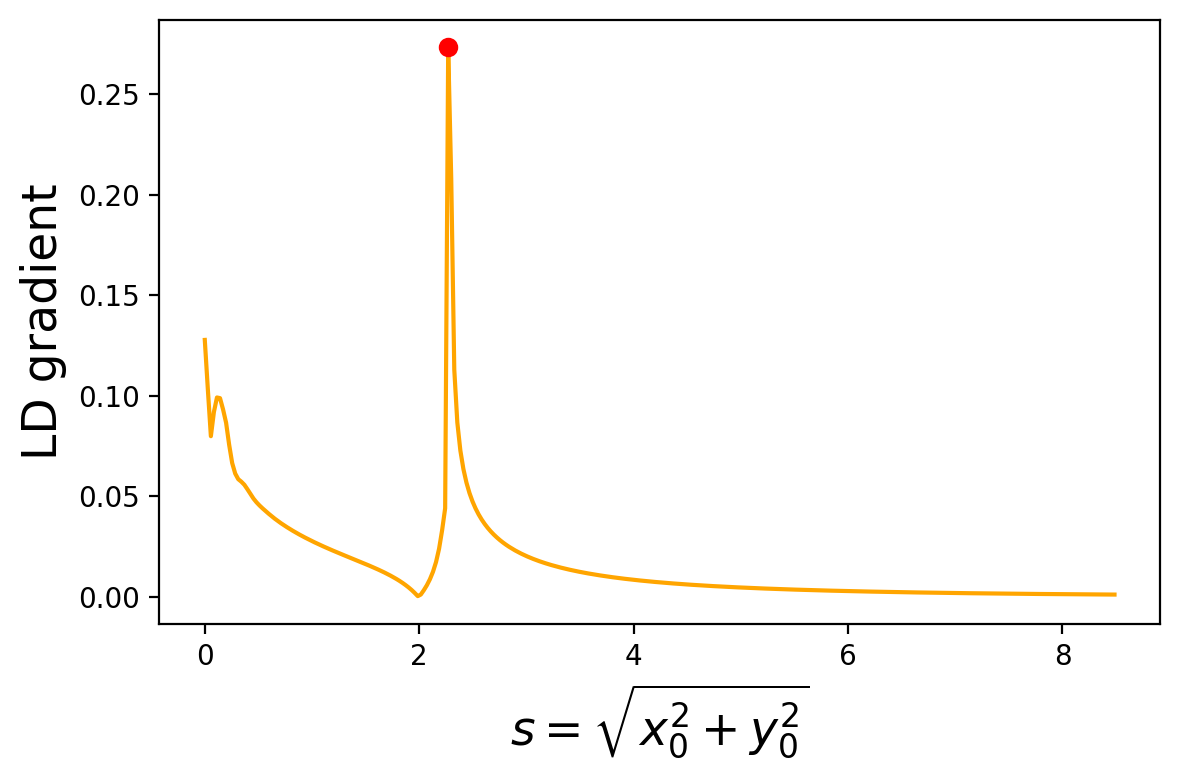

In [23]:
fig = plt.figure(dpi=200)

data = LD_fspline(invariant_curve)
axis = np.linalg.norm(invariant_curve, axis=1)
plt.plot(axis, data, color="orange")

# plot peaks
peaks, _ = find_peaks(data, height=0.25)
plt.plot(axis[peaks], data[peaks], "o", color="red")

plt.xlabel("$s = \sqrt{x_0^2 + y_0^2}$",fontsize=17)
plt.ylabel("LD gradient",fontsize=17)

fig.tight_layout()
plt.show()

## Position of LD singularities and separatrix of trajectories

In [51]:
e1 = np.array([1,1])/np.sqrt(2)

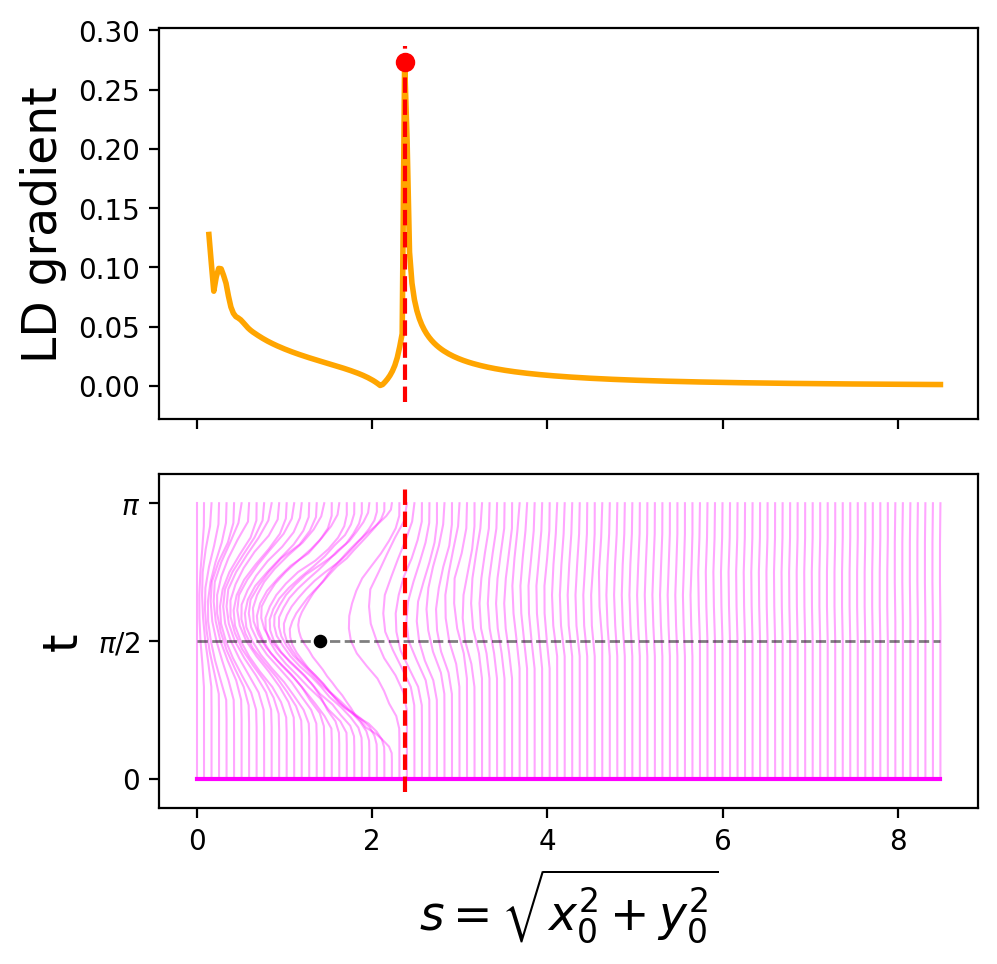

In [70]:
fig,(ax2,ax1) = plt.subplots(2,1,figsize=(5,5),dpi=200,sharex=True)


color_traj = "magenta"

for h in np.linspace(0,6,100):
    ic = h*np.array([1,1])
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    traj_projected = [np.dot(e1, trajectory.T[i]) for i in range(len(trajectory.T))]
    ax1.plot(traj_projected, np.linspace(*time_span,n), c=color_traj, lw=0.75, alpha=0.35)

ax1.set_yticks([0, np.pi/2, np.pi])
ax1.set_yticklabels(["0", "$\pi/2$", "$\pi$"])

ax1.set_ylabel("t",fontsize=17)
ax1.set_xlabel("$s = \sqrt{x_0^2 + y_0^2}$",fontsize=17)

ax1.plot([0,np.sqrt(2*6**2)],[0,0],color="magenta")

nodal_line_inv_set_intersection = np.dot(e1, np.array([1,1]))

ax1.scatter(nodal_line_inv_set_intersection,np.pi/2, color="black",s=15)

#reference line
ax1.plot([0,np.sqrt(2*6**2)],[np.pi/2, np.pi/2],color="black",linestyle="--",lw=1,alpha=0.5)

ax1.set_aspect("equal")

axis = np.linalg.norm(invariant_curve, axis=1)
ax2.plot(axis, data, color="orange",alpha=1,lw=2)
ax2.set_ylabel("LD gradient",fontsize=17)
##############################################
# plot peaks
peaks, _ = find_peaks(data, height=0.25)
y1_lims = ax2.get_ylim()
ax2.plot(2*[axis[peaks]], y1_lims, color="red", linestyle="--", lw=1.5, alpha=1)
ax2.scatter(axis[peaks], data[peaks], color="red",zorder=20)

y0_lims = ax1.get_ylim()
ax1.plot(2*[axis[peaks]], y0_lims, color="red", linestyle="--", lw=1.5, alpha=1)
##############################################

# ax2.set_ylim(0, 0.28)
# ax1.set_ylim(0, np.pi)
fig.tight_layout()
plt.show()

Back to LD

In [74]:
%matplotlib notebook

<IPython.core.display.Javascript object>


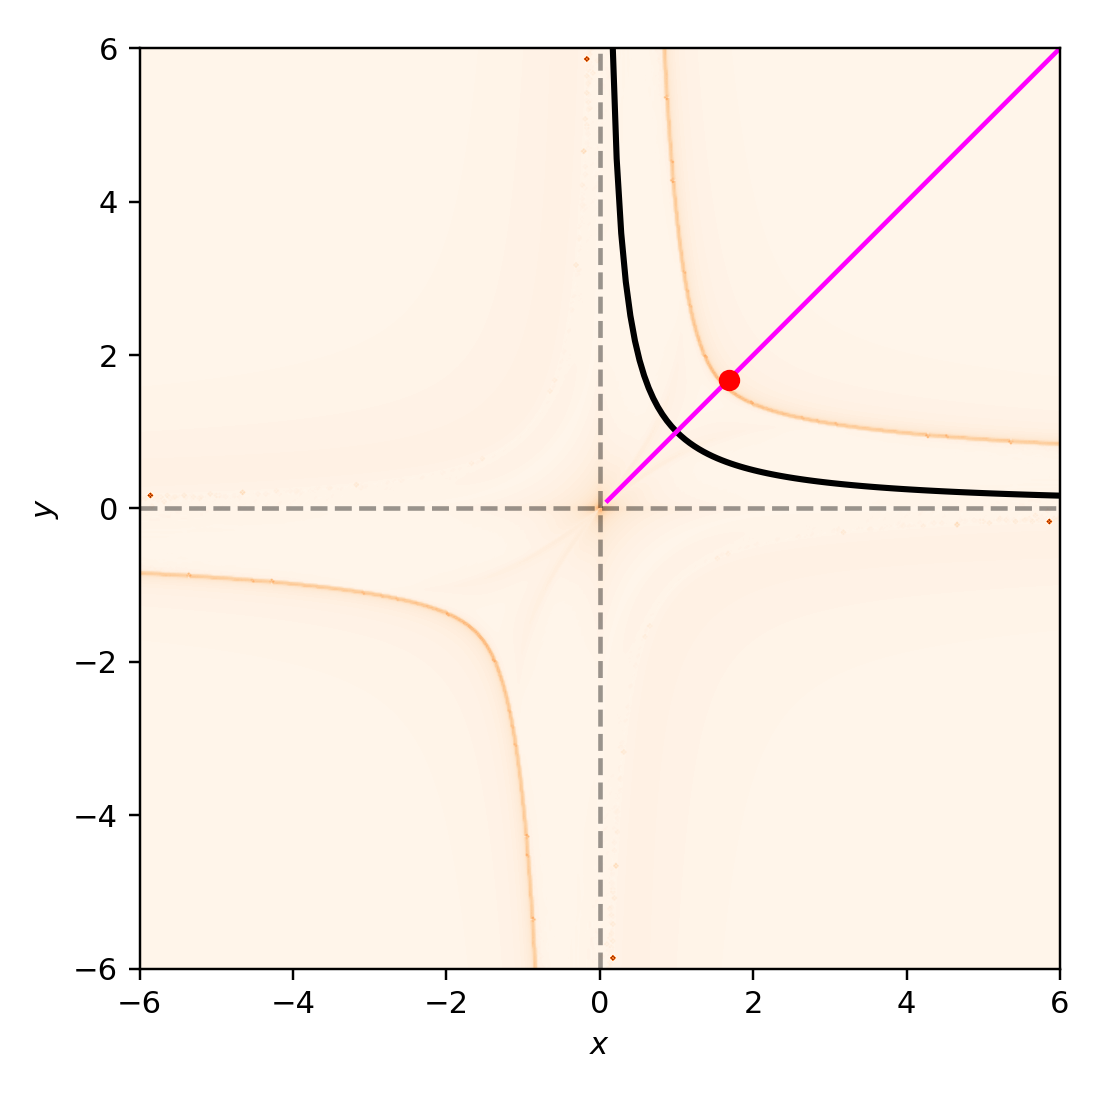

In [77]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

x_right = np.linspace(0.1, 6, 100)
ax.plot(x_right,  1/x_right,color="black",lw=2)
    
# ax.text(1.25,4,"$t = \\frac{\pi}{2}$",color="black",fontsize=10,zorder=20,
#         bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})


x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

LD_gradient = get_gradient_magnitude(LD)
ax.contourf(x, y, LD_gradient, cmap="Oranges",levels=100)

x = np.linspace(0.1,6,300); y = x
invariant_curve = np.column_stack([x, y])
ax.plot(*invariant_curve.T,color="magenta")

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",alpha=0.4)

# plot peak position
ax.scatter(np.sqrt(axis[peaks]**2/2), np.sqrt(axis[peaks]**2/2), color="red",zorder=20)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.set_aspect("equal")
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

fig.tight_layout()

plt.show()

# Figure: trajectories and LD gradient

In [55]:
from ldds.base import compute_lagrangian_descriptor
from ldds.tools import get_gradient_magnitude
from scipy.interpolate import RectBivariateSpline
from scipy.signal import find_peaks

Compute and plot LDs for four resonant cases

In [66]:
# Integration parameters
tau = np.pi

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [100, 100]

grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False

In [67]:
# invariant curve coordinates
x_invariant = np.linspace(0,6,300); y_invariant = x_invariant
invariant_curve = np.column_stack([x_invariant, y_invariant])

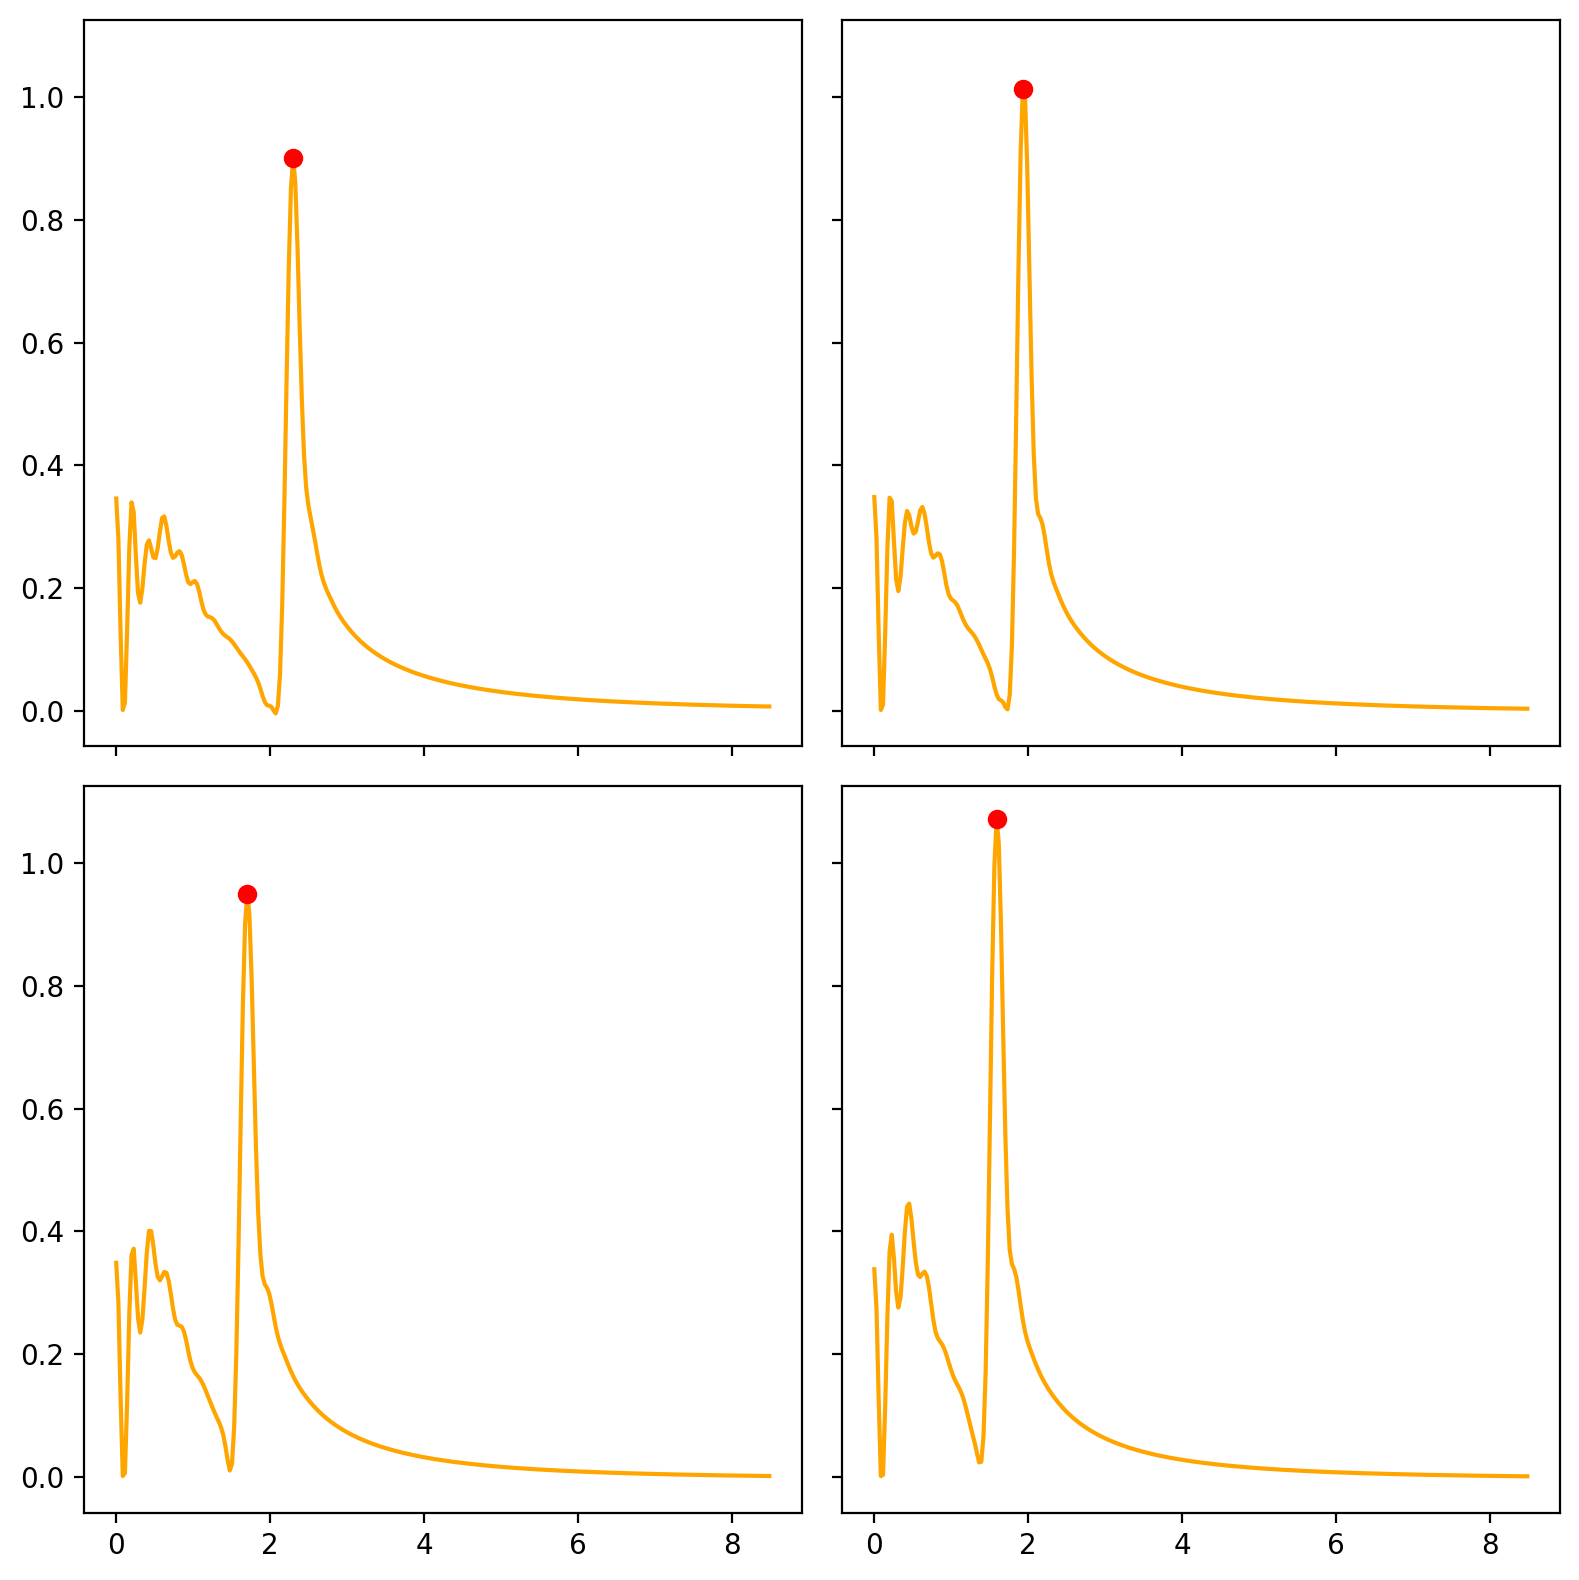

In [70]:
fig,ax = plt.subplots(2,2,figsize=(8,8),dpi=200,sharex=True, sharey=True)

Axes = {
    0: ax[0,0],
    1: ax[0,1],
    2: ax[1,0],
    3: ax[1,1]
}

# LD mesh 
x_axis = np.linspace(*grid_parameters[0])
y_axis = np.linspace(*grid_parameters[1])

for N in range(1,5):
    ax = Axes[N-1]
    
    # define vector field 
    a, b, omega2, t0 = [0, 1, N, 0]
    vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, t0])

    # compute total LD
    LD_forward  = compute_lagrangian_descriptor(grid_parameters,vector_field, tau,p_value)
    LD_backward = compute_lagrangian_descriptor(grid_parameters,vector_field,-tau,p_value)
    LD = LD_forward + LD_backward
    
    # compute LD_gradient along invariante curve 
    LD_gradient = get_gradient_magnitude(LD)
    spline = RectBivariateSpline(x_axis,y_axis,LD_gradient)
    
    def spline_wrap(v):
        return spline(v[0],v[1]).squeeze()

    def fspline(positions):
        surface = np.array(list(map(spline_wrap,positions)))
        return surface
    
    LD_fspline = fspline
    
    LD_invariant_curve = LD_fspline(invariant_curve)
    invariant_curve_arclength = np.linalg.norm(invariant_curve, axis=1)
    
    # plot LD_gradient 
    ax.plot(invariant_curve_arclength, LD_invariant_curve, color="orange")

    # plot LD_gradient peaks
    peaks, _ = find_peaks(LD_invariant_curve, height=0.25)
    peaks_ax1 = invariant_curve_arclength[peaks]
    peaks_ax2 = LD_invariant_curve[peaks]
    # plot last peak
    ax.plot(peaks_ax1[-1], peaks_ax2[-1], "o", color="red")
    
    
    
    

    
    
fig.tight_layout()
plt.show()

## Interpolation of LD data for evaluation on invariant set

In [11]:
# Mesh parameters
x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

spline = RectBivariateSpline(x,y,LD_gradient)

In [12]:
LD_fspline = fspline

# invariant curve coordinates
x = np.linspace(0,6,300); y = x

invariant_curve = np.column_stack([x, y])

fig = plt.figure(dpi=200)

data = LD_fspline(invariant_curve)
axis = np.linalg.norm(invariant_curve, axis=1)
plt.plot(axis, data, color="orange")

# plot peaks
peaks, _ = find_peaks(data, height=0.25)
plt.plot(axis[peaks], data[peaks], "o", color="red")

plt.xlabel("$s = \sqrt{x_0^2 + y_0^2}$",fontsize=17)
plt.ylabel("LD gradient",fontsize=17)

fig.tight_layout()
plt.show()

# TEST

In [161]:
s = np.linspace(0, 5, 100)
t = 0.0001

In [162]:
def vec(t, s):
    return -4*np.sin(2*t)*s/(4 + 4*np.cos(2*t)*s**2 + s**4)

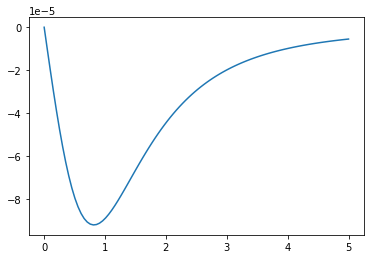

In [163]:
fig = plt.figure()
plt.plot(s, vec(t, s))
plt.show()

In [164]:
from scipy.integrate import solve_ivp

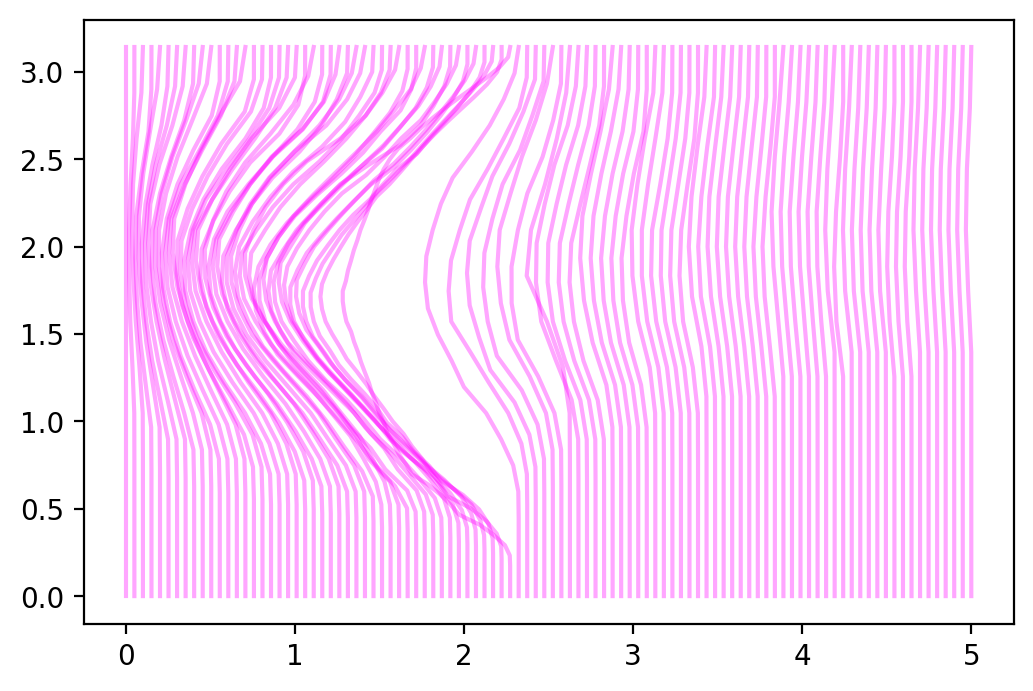

In [170]:
fig,ax = plt.subplots(1,1,dpi=200)

time_span = (0, np.pi)
for h in np.linspace(0,5, 100):
    solution = solve_ivp(vec, time_span, [h], rtol=2.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    ax.plot(trajectory[0], np.linspace(*time_span,n),color="magenta",alpha=0.35)

#     ax.plot(trajectory[0], vec(np.linspace(*time_span,n), trajectory[0]),color="magenta",lw=0.5,alpha=0.35)
    
plt.show()

In [137]:
trajectory[0]

array([7.07106781, 7.07106781, 7.07106781, 7.07106714, 7.07100094,
       7.06655618, 7.06661859, 7.07106812])

In [ ]:
fig,ax = plt.subplots(1,1)

time_span = (0, np.pi)

for h in np.sqrt(2)*np.linspace(0, 5, 100):
    ic = h
    solution = solve_ivp(vec, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    traj_projected = trajectory.T[i] for i in range(len(trajectory.T))]
    ax.plot(traj_projected, np.linspace(*time_span,n), c="magenta", lw=0.75, alpha=0.35)
    
plt.show()